In [96]:
from inverse_RTI import inverse_RTI, inverse_RTI_preparation
from functions import *

parameters = {}

parameters['time'] = time.time()
parameters['num_devices'] = 20
parameters['device_indices'] = [x+1 for x in range(parameters['num_devices'])]

# device parameters
parameters['sample_rate'] = 1e6  # Hz
parameters['num_samples'] = 100  # number of samples per call to rx()
parameters['center_freq'] = 2.4e9  # Hz
parameters['bandwidth'] = 10  # Hz
parameters['transmitter_attenuation'] = 0  # dB
parameters['receiver_gain'] = 40  # dB

# imaging parameters
parameters['doi_size'] = 3
parameters['alpha'] = 1e2  # 1e2
parameters['grid_resolution'] = 0.1
parameters['detection_size'] = 0.1
parameters['pixel_size'] = (int(parameters['doi_size']/parameters['grid_resolution']), int(parameters['doi_size']/parameters['grid_resolution']))

parameters['eterm'] = 1

RTI_matrix = inverse_RTI_preparation(parameters)

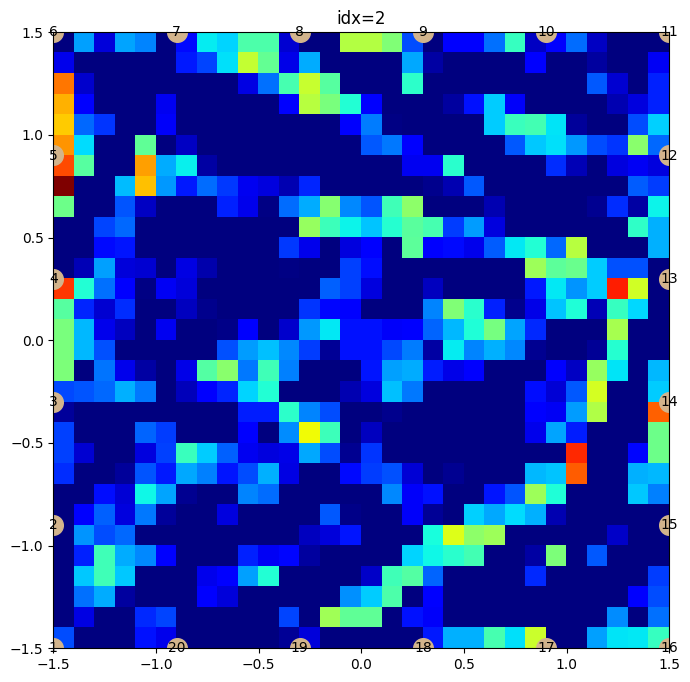

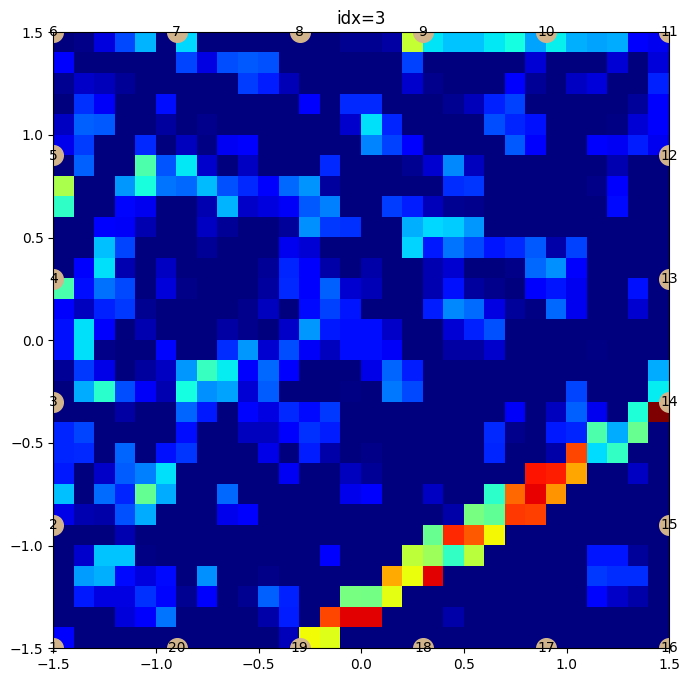

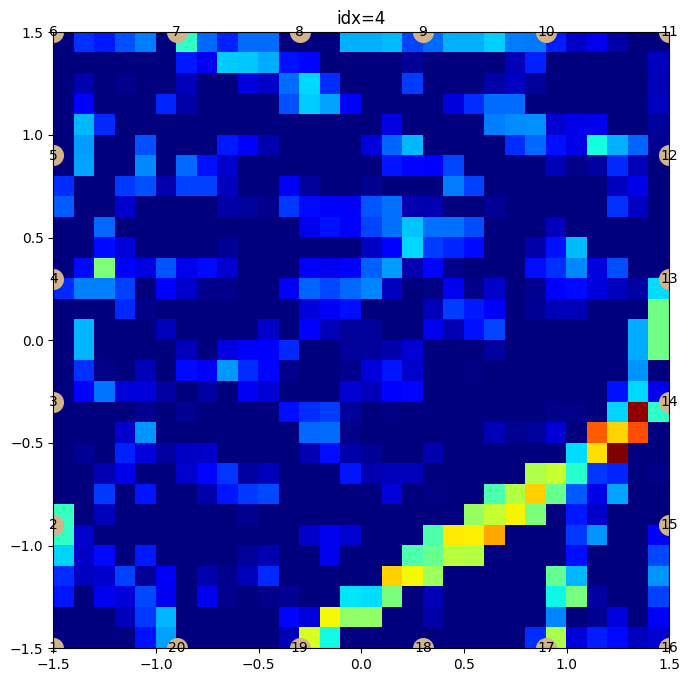

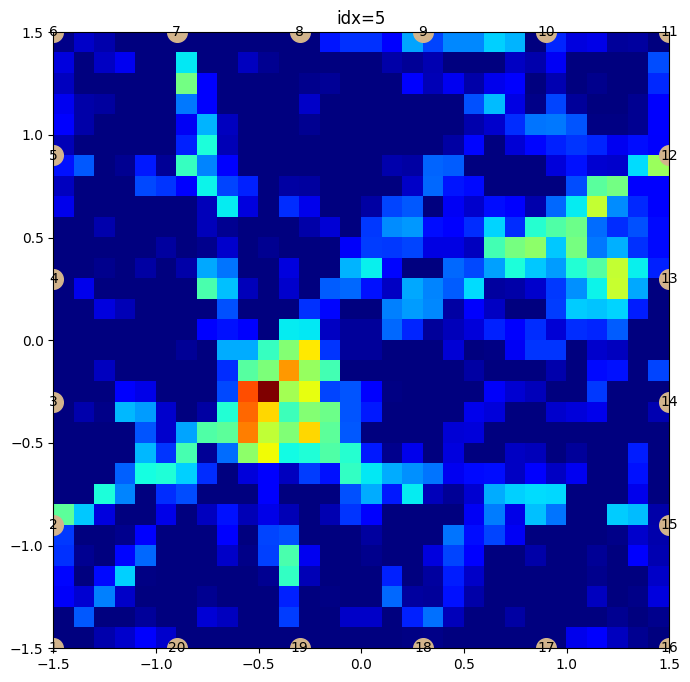

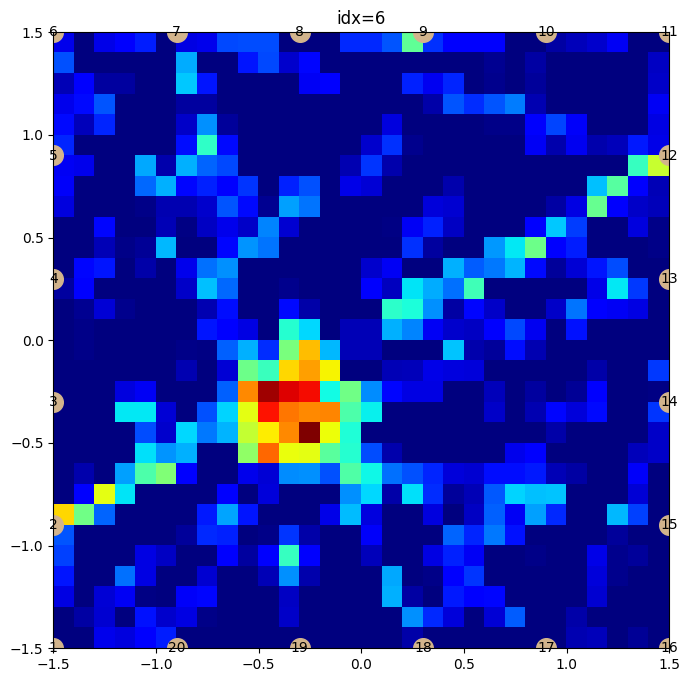

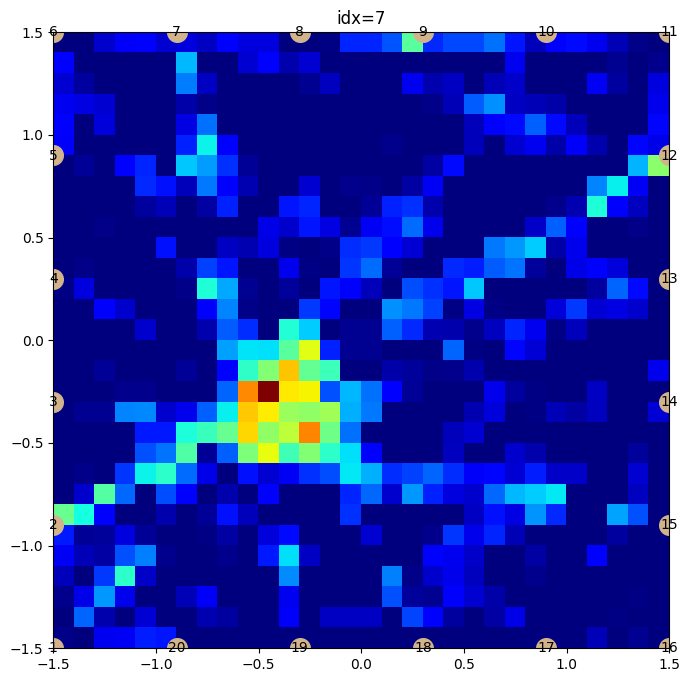

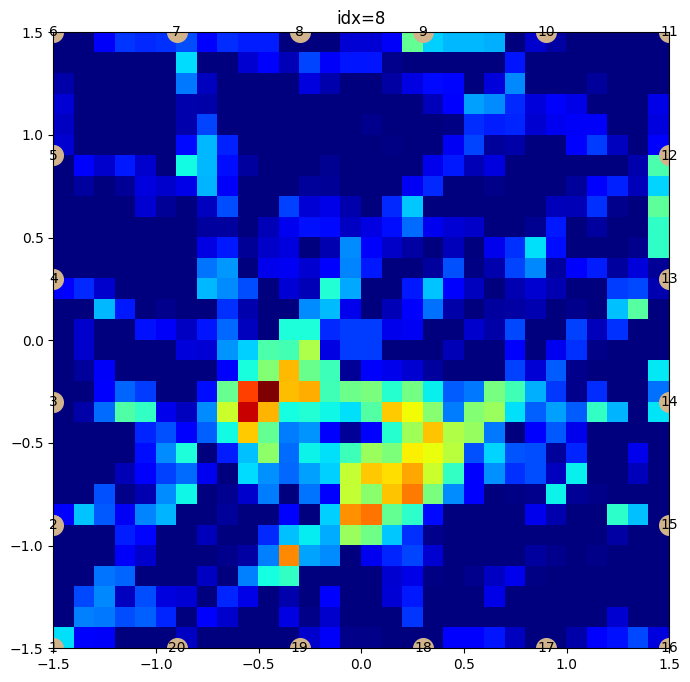

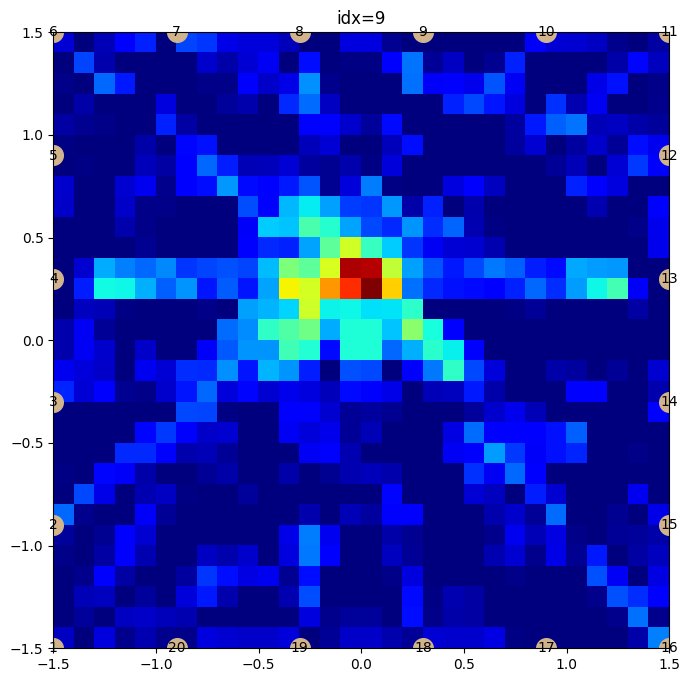

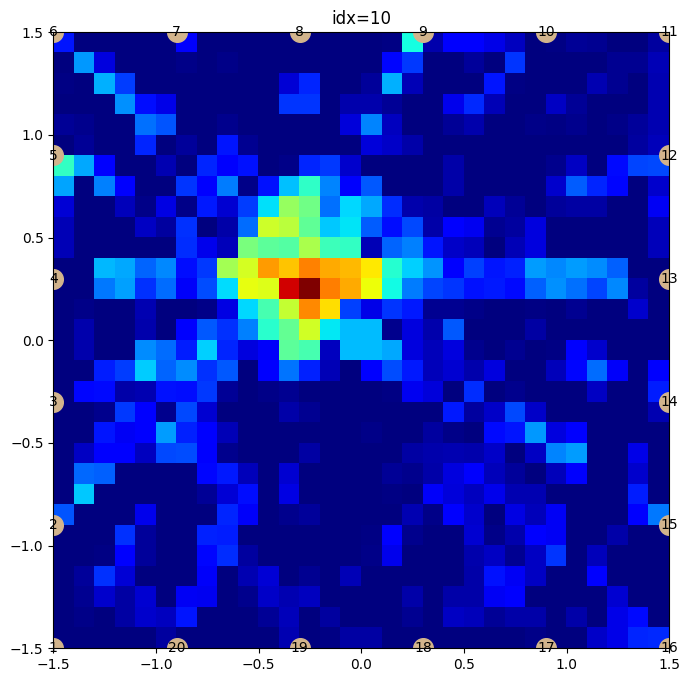

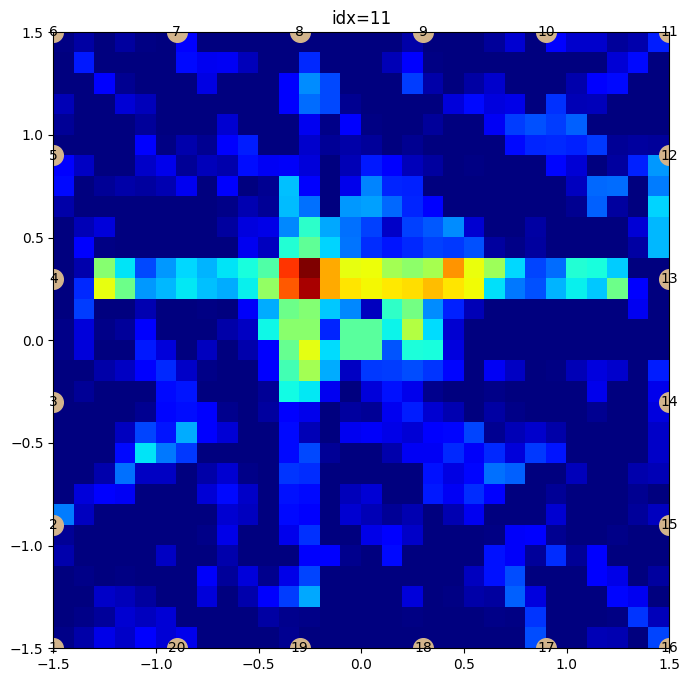

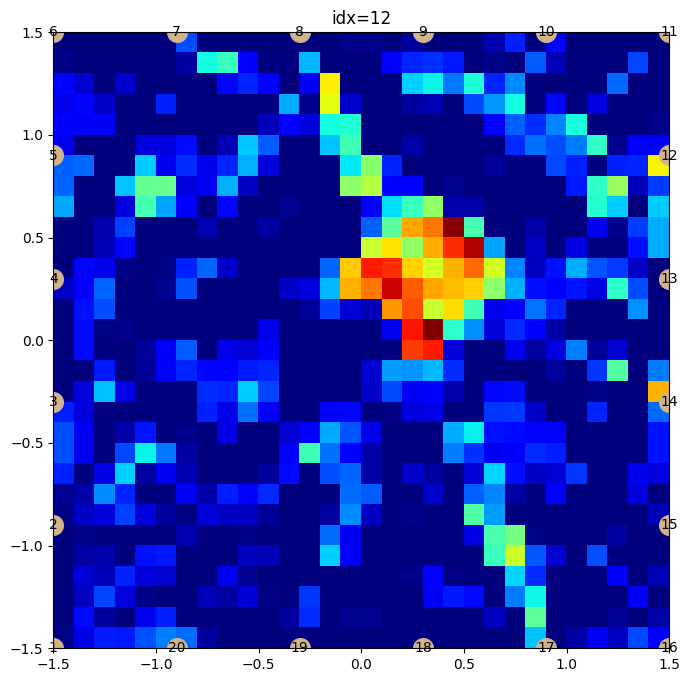

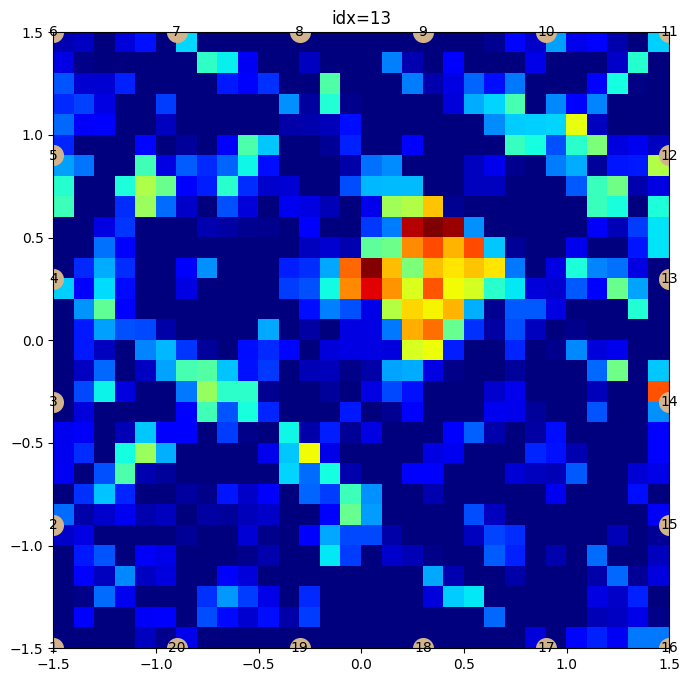

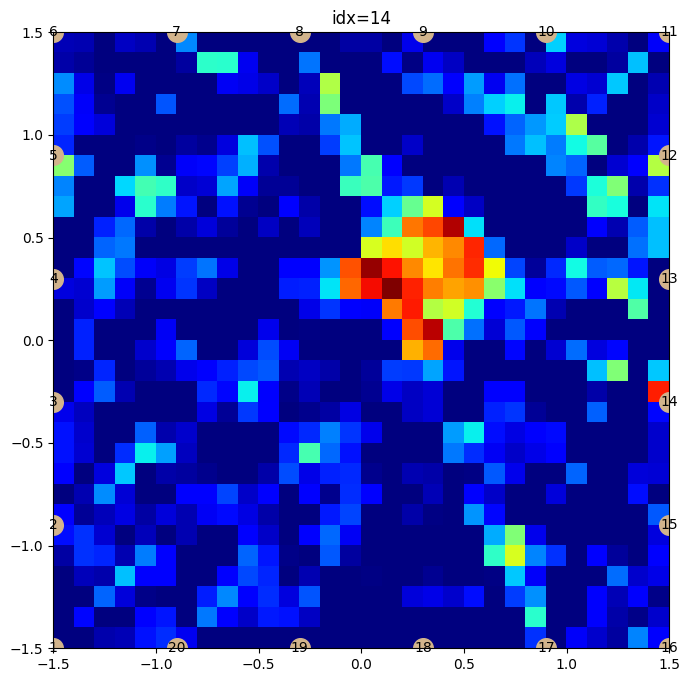

In [97]:
for idx in range(2, 15):
    
    Pinc = np.load('result/1.npy')
    Ptot = np.load(f'result/{idx}.npy')

    Pinc = magnitude_to_db(abs(np.mean(np.squeeze(Pinc), axis=2)), parameters['receiver_gain'])
    Pinc = Pinc[~np.eye(Pinc.shape[0],dtype=bool)].reshape(-1,1)
    Ptot = magnitude_to_db(abs(np.mean(np.squeeze(Ptot), axis=2)), parameters['receiver_gain'])

    result = inverse_RTI(parameters, Pinc, Ptot, RTI_matrix, plot=True)
    result = result.reshape(int(parameters['doi_size']/parameters['grid_resolution']), int(parameters['doi_size']/parameters['grid_resolution']))

    result = np.rot90(result.T, k=1)

    plt.figure(figsize=(8, 8))
    plt.imshow(result, 
            vmin=0, vmax=1,
            extent=[-parameters['doi_size']/2, parameters['doi_size']/2, -parameters['doi_size']/2, parameters['doi_size']/2], 
            cmap='jet')

    for i in range(parameters['num_devices']):
            plt.scatter(parameters['device_coordinates'][0][i]-1.5, parameters['device_coordinates'][1][i]-1.5, c='tan', s=200)
            plt.text(parameters['device_coordinates'][0][i]-1.5, parameters['device_coordinates'][1][i]-1.5, s=i+1, va='center', ha='center')

    plt.title(f'{idx=}')
    plt.show()

In [11]:

import adi
sdr = adi.Pluto('ip:192.168.5.1') # or whatever your Pluto's IP is
sdr.sample_rate = int(2.5e6)
sdr.rx()

Exception: No device found